In [2]:
import matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    
from sklearn.ensemble import RandomForestClassifier




In [3]:
data=pd.read_csv(r"E:\Advance python\Worker_health_data.csv")
data

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23744\3756179883.py:1: DtypeWarning: Columns (0,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"E:\Advance python\Worker_health_data.csv")


,timezone,unixTimestampInMs,isoDate,deviceType,bbi,beatsPerMinute,spo2,breathsPerMinute,durationInMs,steps,totalSteps,stressLevel,Health
0,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:01.840+03:00,garmin_Vivosmart5,762.0,93.0,95.0,12.0,60.0,0.0,3490.0,87.0,no_effect
1,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:02.602+03:00,garmin_Vivosmart5,766.0,69.0,96.0,12.0,60.0,0.0,3490.0,32.0,no_effect
2,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:03.368+03:00,garmin_Vivosmart5,795.0,93.0,89.0,13.0,60.0,0.0,3490.0,90.0,severe_effect
3,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:04.163+03:00,garmin_Vivosmart5,795.0,80.0,95.0,13.0,60.0,95.0,3585.0,68.0,no_effect
4,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:04.958+03:00,garmin_Vivosmart5,809.0,79.0,90.0,13.0,60.0,83.0,3668.0,64.0,severe_effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247195,NaN,NaN,NaN,garmin_Vivosmart5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247196,NaN,NaN,NaN,garmin_Vivosmart5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247197,NaN,NaN,NaN,garmin_Vivosmart5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247198,NaN,NaN,NaN,garmin_Vivosmart5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.fillna(0)

,timezone,unixTimestampInMs,isoDate,deviceType,bbi,beatsPerMinute,spo2,breathsPerMinute,durationInMs,steps,totalSteps,stressLevel,Health
0,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:01.840+03:00,garmin_Vivosmart5,762.0,93.0,95.0,12.0,60.0,0.0,3490.0,87.0,no_effect
1,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:02.602+03:00,garmin_Vivosmart5,766.0,69.0,96.0,12.0,60.0,0.0,3490.0,32.0,no_effect
2,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:03.368+03:00,garmin_Vivosmart5,795.0,93.0,89.0,13.0,60.0,0.0,3490.0,90.0,severe_effect
3,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:04.163+03:00,garmin_Vivosmart5,795.0,80.0,95.0,13.0,60.0,95.0,3585.0,68.0,no_effect
4,Asia/Riyadh,1.700000e+12,2023-09-21T11:00:04.958+03:00,garmin_Vivosmart5,809.0,79.0,90.0,13.0,60.0,83.0,3668.0,64.0,severe_effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247195,0,0.000000e+00,0,garmin_Vivosmart5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
247196,0,0.000000e+00,0,garmin_Vivosmart5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
247197,0,0.000000e+00,0,garmin_Vivosmart5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
247198,0,0.000000e+00,0,garmin_Vivosmart5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
data.columns

Index(['timezone', 'unixTimestampInMs', 'isoDate', 'deviceType', 'bbi',
       'beatsPerMinute', 'spo2', 'breathsPerMinute', 'durationInMs', 'steps',
       'totalSteps', 'stressLevel', 'Health'],
      dtype='object')

In [6]:
data=data.drop(columns=['timezone', 'unixTimestampInMs', 'isoDate', 'deviceType'
    ])

In [7]:
data.columns

Index(['bbi', 'beatsPerMinute', 'spo2', 'breathsPerMinute', 'durationInMs',
       'steps', 'totalSteps', 'stressLevel', 'Health'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data['Health']=l.fit_transform(data['Health'])
data['Health']

0         0
1         0
2         1
3         0
4         1
         ..
247195    2
247196    2
247197    2
247198    2
247199    2
Name: Health, Length: 247200, dtype: int32

<BarContainer object of 247200 artists>

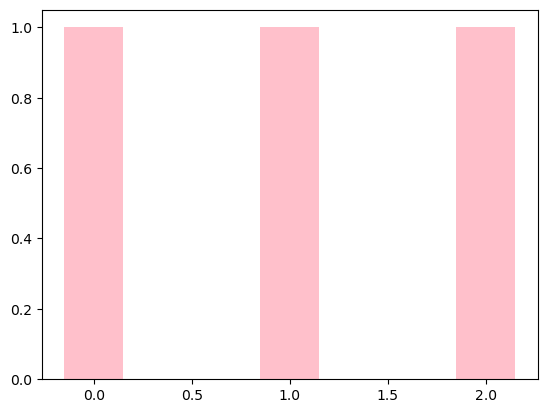

In [9]:
outcome=data['Health']
plt.bar(outcome, height=1, width=0.3, color='pink')

In [10]:
data.columns

Index(['bbi', 'beatsPerMinute', 'spo2', 'breathsPerMinute', 'durationInMs',
       'steps', 'totalSteps', 'stressLevel', 'Health'],
      dtype='object')

In [11]:
x=data.drop('Health', axis=1)
y=data['Health']
y

0         0
1         0
2         1
3         0
4         1
         ..
247195    2
247196    2
247197    2
247198    2
247199    2
Name: Health, Length: 247200, dtype: int32

In [12]:
x=x.fillna(x.mean())

In [13]:
y=l.fit_transform(y)
y

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=10)

In [16]:
prediction2 = clf.predict(x_test)
from sklearn.metrics import accuracy_score
prediction2

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [17]:
accuracy2 = accuracy_score(y_test, prediction2)
print("The accuracy of model is", accuracy2)

The accuracy of model is 0.9901901294498382


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.60      0.01      0.01       455
           1       0.57      0.99      0.73       631
           2       1.00      1.00      1.00     48354

    accuracy                           0.99     49440
   macro avg       0.72      0.66      0.58     49440
weighted avg       0.99      0.99      0.99     49440



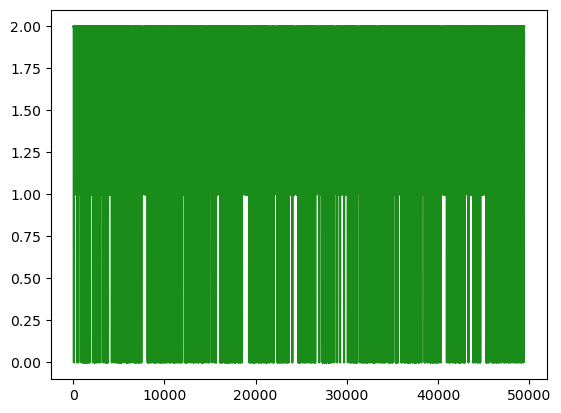

In [19]:
plt.plot(y_test,color='green',alpha=0.9)

In [20]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test,prediction2,labels=[0,1,2,3,4,5,6])
cm

array([[    3,   439,    13,     0,     0,     0,     0],
       [    0,   622,     9,     0,     0,     0,     0],
       [    2,    22, 48330,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0]], dtype=int64)

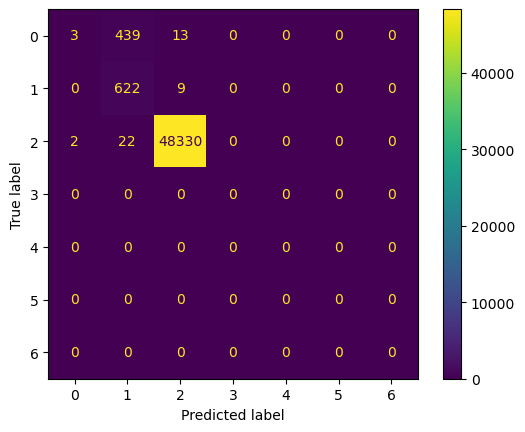

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#labels=['Ca','Os','Ts','Ys','Us','Ms','Bs']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  #,display_labels=labels
disp.plot()

plt.show()

In [22]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train, y_train)
clf

DecisionTreeClassifier()

In [23]:
pred=clf.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, pred)
print('The accuracy of Chambal model is: ', acc)

The accuracy of Chambal model is:  0.9993325242718447


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       455
           1       0.97      0.98      0.98       631
           2       1.00      1.00      1.00     48354

    accuracy                           1.00     49440
   macro avg       0.98      0.98      0.98     49440
weighted avg       1.00      1.00      1.00     49440

